# Joining Data

In [4]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sql-bigquery-341310-c5b9409e541c.json"
from bigquery_functions import *

# Create a "Client" object
client = bigquery.Client()

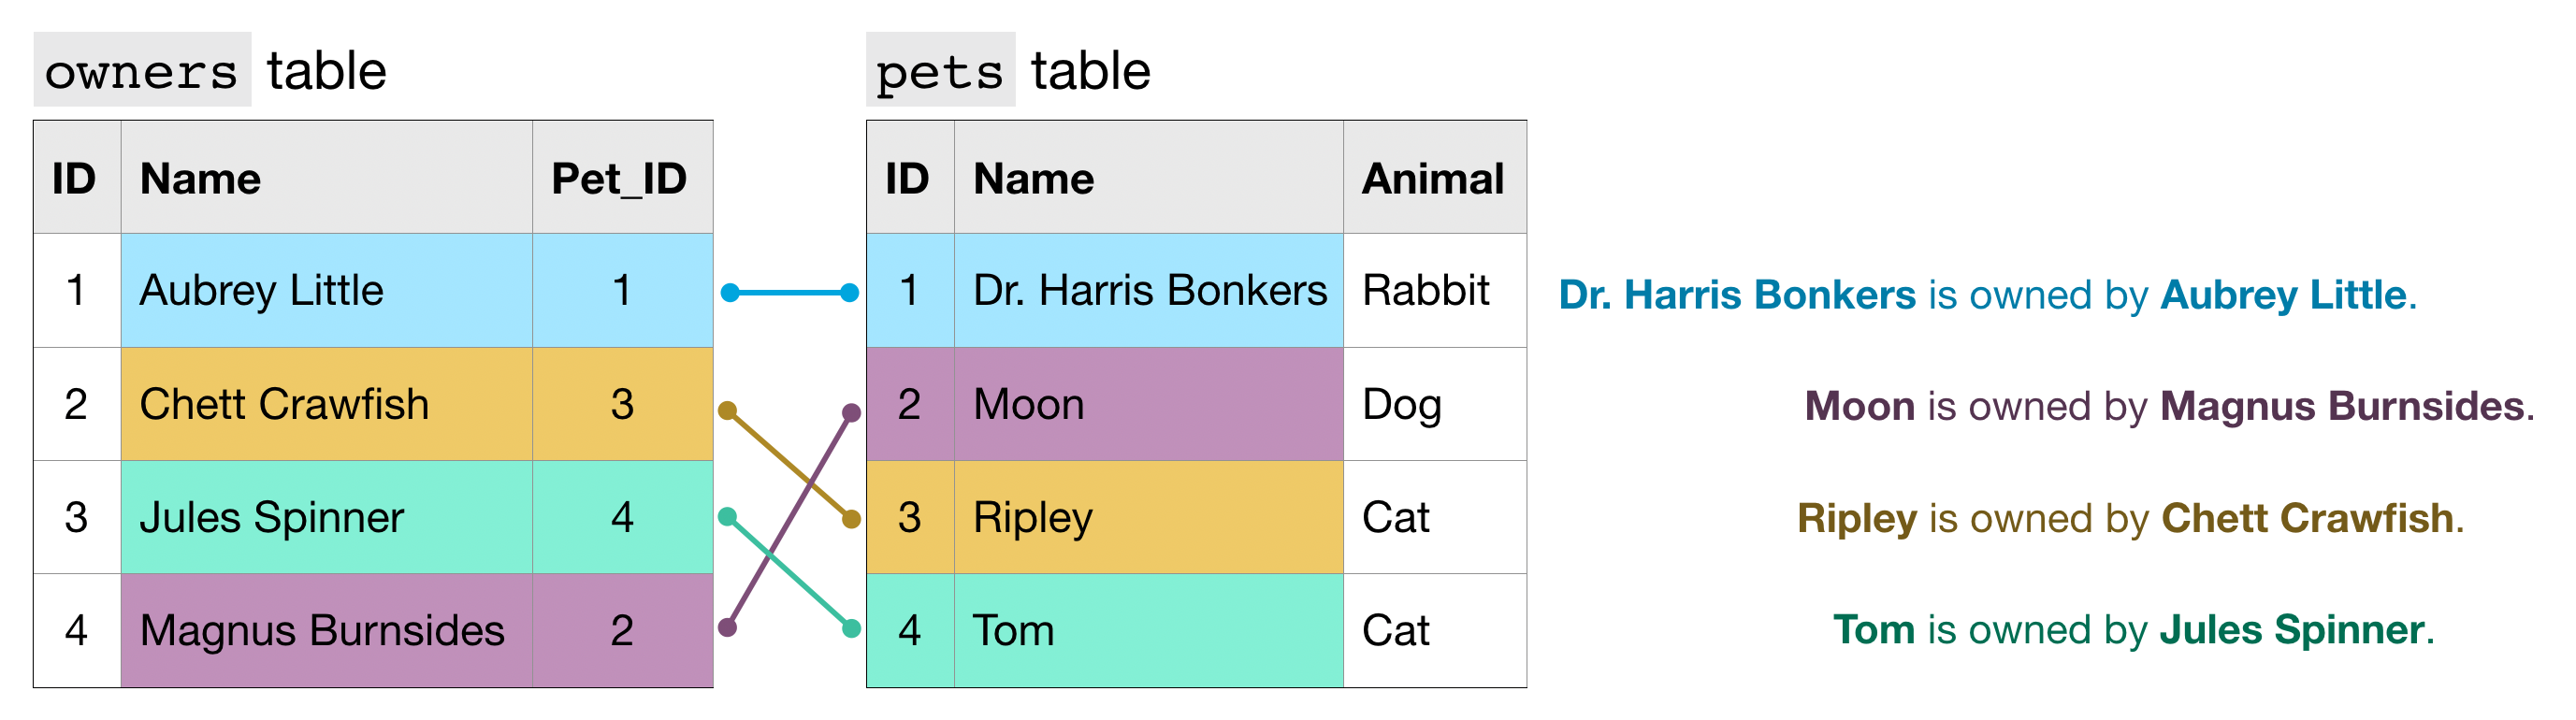

## Inner Join

Using JOIN, we can write a query to create a table with just two columns: the name of the pet and the name of the owner.
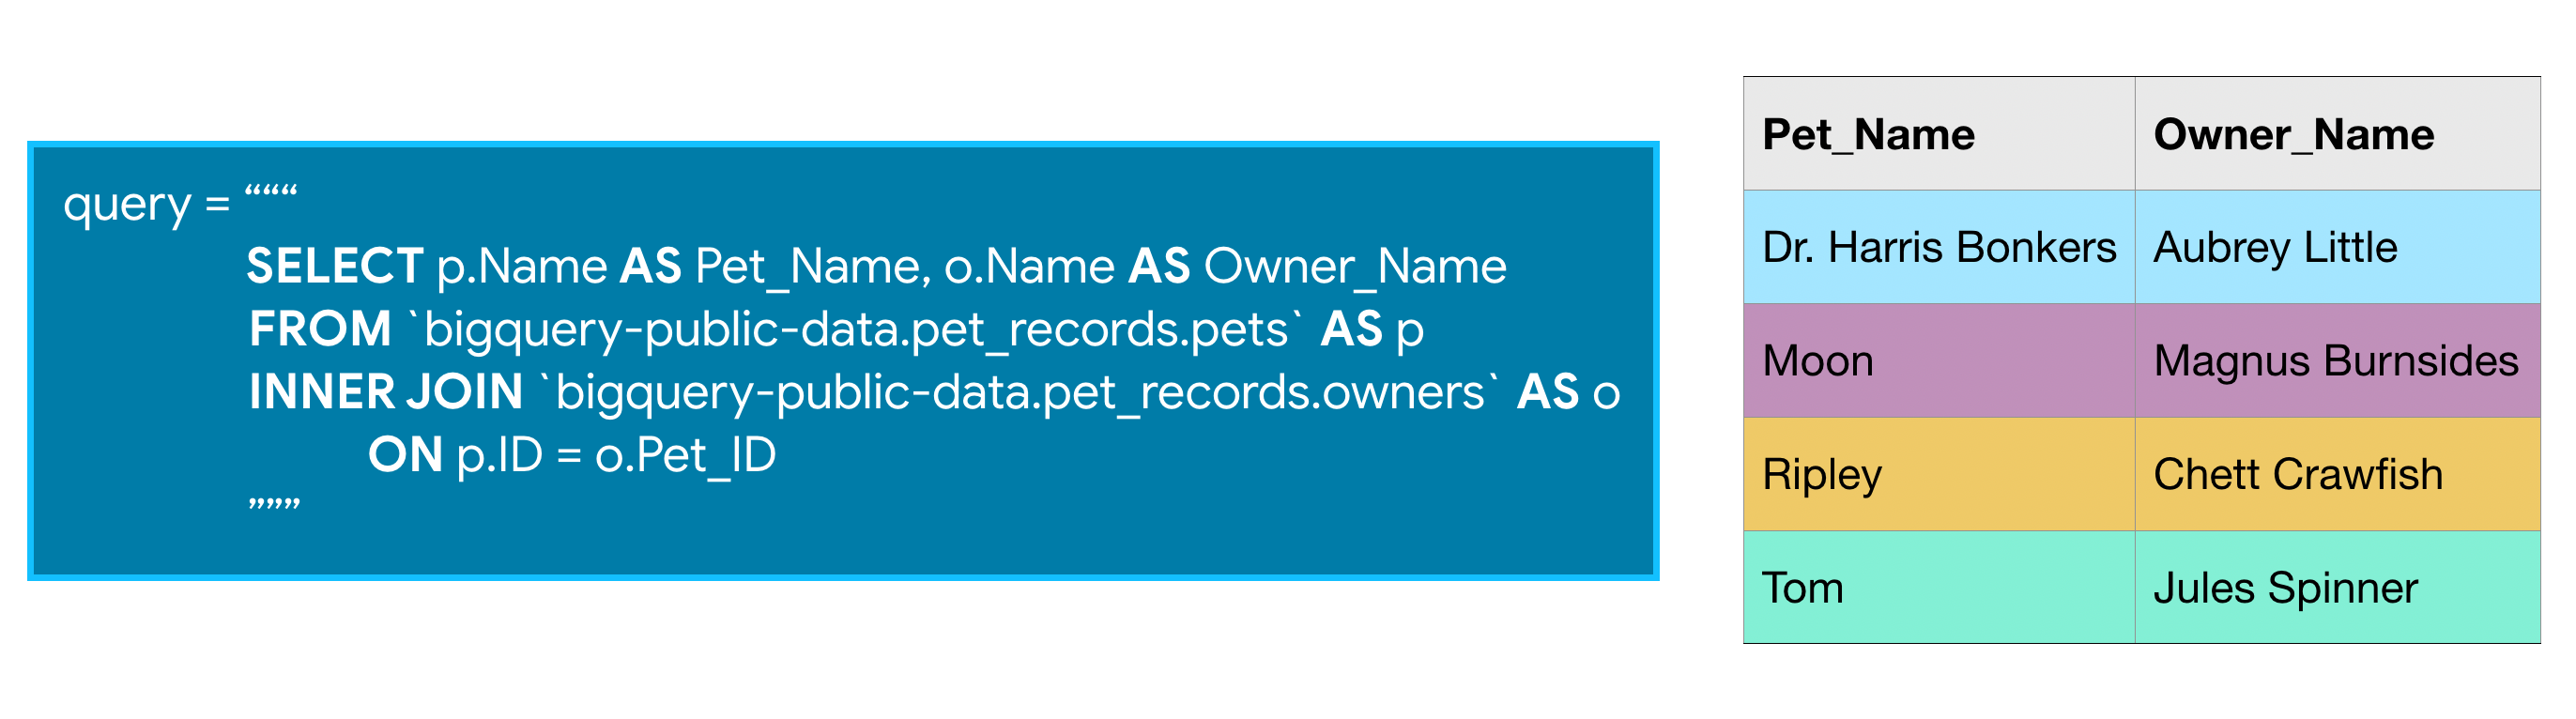

In [6]:
dataset_ref = list_dataset_tables(client, 'github_repos')

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


In [8]:
licenses_table = get_table(client, dataset_ref, 'licenses')
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,DavidIAm/Replay,artistic-2.0
1,Japroinovador/i2gbits,artistic-2.0
2,gitgovgit/V_UN,artistic-2.0
3,Us3rNam/Encrypted_LAN_Chat,artistic-2.0
4,shlomif/shirl-hart-freecell-solver,artistic-2.0


In [9]:
files_table = get_table(client, dataset_ref, 'sample_files')
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


In [10]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

In [11]:
file_count_by_license = run_query(query, client, 10**10)
file_count_by_license

,license,number_of_files
0,mit,20403267
1,gpl-2.0,16448998
2,apache-2.0,7128944
3,gpl-3.0,4853568
4,bsd-3-clause,3157140
5,agpl-3.0,1323979
6,lgpl-2.1,777057
7,bsd-2-clause,685940
8,lgpl-3.0,567630
9,mpl-2.0,462447
